In [1]:
import pandas as pd
import numpy as np
import copy
import glob

# Map Writing Information to each own writers

## Check writers that wrote at least 1 file and Native-Language = Swiss German, German, and French

In [2]:
writers_info = pd.read_xml('./Data/writers-metadata/writers.xml')
writers_info

,name,DayOfBirth,EducationalDegree,Gender,NativeCountry,NativeLanguage,OtherLanguage,Profession,WritingType,Science,WrittenLanguage
0,10000,1982-06-08,Dipl. Inform.,Male,Germany,German,French,PhD-Student,Right-handed,Mathematics,English
1,10001,NaN,NaN,Male,France,French,None,None,Right-handed,None,English
2,10002,NaN,NaN,Male,Great Britain,English,None,None,Right-handed,None,English
3,10003,NaN,NaN,Male,France,French,None,None,Right-handed,None,English
4,10004,NaN,NaN,Male,France,French,None,None,Right-handed,None,English
...,...,...,...,...,...,...,...,...,...,...,...
217,10217,1979-09-03,Matur,Male,Switzerland,Swiss German,English,Student,Left-handed,Computer Science,German
218,10218,1984-04-29,Matur,Male,Switzerland,Swiss German,None,Student,Right-handed,Chemestry,French
219,10219,1958-01-04,Dipl. Math.,Female,Switzerland,French,English,System Ingenieur,Right-handed,Computer Science,German
220,10220,1979-03-26,Matur,Male,Switzerland,German,French,Student,Right-handed,Computer Science,English


In [3]:
writers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               222 non-null    int64 
 1   DayOfBirth         197 non-null    object
 2   EducationalDegree  197 non-null    object
 3   Gender             222 non-null    object
 4   NativeCountry      222 non-null    object
 5   NativeLanguage     222 non-null    object
 6   OtherLanguage      135 non-null    object
 7   Profession         189 non-null    object
 8   WritingType        222 non-null    object
 9   Science            173 non-null    object
 10  WrittenLanguage    222 non-null    object
dtypes: int64(1), object(10)
memory usage: 19.2+ KB


In [4]:
writer_id_list = []
with open('./Data/forms.txt', 'r') as file:
  mapping = file.read().splitlines()[20:]
  for i in mapping:
    writer_id_list.append(int(i.split(' ')[1]))
writer_id_list = np.array(writer_id_list)
writer_id_list = np.unique(writer_id_list)
print(mapping)
print(writer_id_list)
print(len(writer_id_list))

['a01-000u 10011 0', 'a01-000x 10018 2', 'a01-001w 10026 1', 'a01-001z 10028 1', 'a01-003 10009 0', 'a01-003x 10012 2', 'a01-004w 10026 1', 'a01-007w 10026 1', 'a01-007z 10091 1', 'a01-009w 10026 1', 'a01-011 10022 2', 'a01-011x 10020 2', 'a01-013w 10026 1', 'a01-013z 10156 1', 'a01-014 10007 2', 'a01-014x 10011 2', 'a01-017w 10026 1', 'a01-020 10015 2', 'a01-020x 10002 0', 'a01-020w 10026 1', 'a01-020z 10221 1', 'a01-023w 10026 1', 'a01-023z 10029 1', 'a01-030z 10092 1', 'a01-037z 10157 1', 'a01-038x 10005 0', 'a01-048z 10030 1', 'a01-053 10024 0', 'a01-053a 10024 2', 'a01-053x 10011 0', 'a01-053z 10093 1', 'a01-058z 10158 1', 'a01-063x 10007 2', 'a01-067z 10032 1', 'a01-073z 10094 1', 'a01-077 10008 2', 'a01-080z 10159 1', 'a01-087 10021 0', 'a01-090z 10031 1', 'a01-094z 10095 1', 'a01-099z 10160 1', 'a01-107 10014 2', 'a01-117 10010 2', 'a01-132 10014 0', 'a02-000 10017 0', 'a02-004 10011 0', 'a02-008 10017 2', 'a02-012 10009 2', 'a02-017 10014 0', 'a02-037 10015 0', 'a02-046 10014 

In [5]:
writers_info['NativeLanguage'].value_counts()

NativeLanguage
Swiss German    162
French           20
German           19
Finnish           3
English           2
Russian           2
Spanish           2
Hungarian         2
Slovakian         1
Unkrainian        1
Polnish           1
Serbian           1
Portuguese        1
Persian           1
Slovak            1
Turkish           1
Chinese           1
j                 1
Name: count, dtype: int64

In [6]:
native_lang_list = ['Swiss German', 'German', 'French']
writers_info = writers_info.loc[(writers_info['name'].isin(writer_id_list)) & (writers_info['NativeLanguage'].isin(native_lang_list))]
# mapping = writers_info['name'].values.tolist()
# # print(mapping)
writers_info = writers_info.set_index('name')
writers_info

,DayOfBirth,EducationalDegree,Gender,NativeCountry,NativeLanguage,OtherLanguage,Profession,WritingType,Science,WrittenLanguage
name,,,,,,,,,,
10000,1982-06-08,Dipl. Inform.,Male,Germany,German,French,PhD-Student,Right-handed,Mathematics,English
10004,NaN,NaN,Male,France,French,None,None,Right-handed,None,English
10005,NaN,NaN,Male,Switzerland,Swiss German,None,None,Right-handed,None,French
10006,NaN,NaN,Female,Switzerland,Swiss German,None,None,Right-handed,None,English
10007,NaN,NaN,Male,France,French,None,None,Right-handed,None,English
...,...,...,...,...,...,...,...,...,...,...
10215,1977-01-25,Matur,Male,Switzerland,Swiss German,None,Student,Left-handed,Computer Science,French
10217,1979-09-03,Matur,Male,Switzerland,Swiss German,English,Student,Left-handed,Computer Science,German
10218,1984-04-29,Matur,Male,Switzerland,Swiss German,None,Student,Right-handed,Chemestry,French


In [7]:
print(writers_info.index)

Index([10000, 10004, 10005, 10006, 10007, 10008, 10009, 10010, 10011, 10012,
       ...
       10209, 10210, 10211, 10213, 10214, 10215, 10217, 10218, 10219, 10220],
      dtype='int64', name='name', length=197)


In [8]:
writers_info['NativeLanguage'].value_counts()

NativeLanguage
Swiss German    162
German           19
French           16
Name: count, dtype: int64

## Map Every Forms To Their Owners (Writers).

In [9]:
import os

for i in writers_info.index:
  writer_directory = f'./Data/Formatted-Data/{i}'
  if not os.path.exists(writer_directory):
    os.makedirs(writer_directory)

In [10]:
print(mapping)
mapping_dict = {}
for i in mapping:
  tmp = i.split(' ')
  key = int(tmp[1])
  val = tmp[0]
  # print(key)
  if key not in mapping_dict.keys():
    mapping_dict[key] = [val]
  else:
    mapping_dict[key].append(val)

print(mapping_dict)

['a01-000u 10011 0', 'a01-000x 10018 2', 'a01-001w 10026 1', 'a01-001z 10028 1', 'a01-003 10009 0', 'a01-003x 10012 2', 'a01-004w 10026 1', 'a01-007w 10026 1', 'a01-007z 10091 1', 'a01-009w 10026 1', 'a01-011 10022 2', 'a01-011x 10020 2', 'a01-013w 10026 1', 'a01-013z 10156 1', 'a01-014 10007 2', 'a01-014x 10011 2', 'a01-017w 10026 1', 'a01-020 10015 2', 'a01-020x 10002 0', 'a01-020w 10026 1', 'a01-020z 10221 1', 'a01-023w 10026 1', 'a01-023z 10029 1', 'a01-030z 10092 1', 'a01-037z 10157 1', 'a01-038x 10005 0', 'a01-048z 10030 1', 'a01-053 10024 0', 'a01-053a 10024 2', 'a01-053x 10011 0', 'a01-053z 10093 1', 'a01-058z 10158 1', 'a01-063x 10007 2', 'a01-067z 10032 1', 'a01-073z 10094 1', 'a01-077 10008 2', 'a01-080z 10159 1', 'a01-087 10021 0', 'a01-090z 10031 1', 'a01-094z 10095 1', 'a01-099z 10160 1', 'a01-107 10014 2', 'a01-117 10010 2', 'a01-132 10014 0', 'a02-000 10017 0', 'a02-004 10011 0', 'a02-008 10017 2', 'a02-012 10009 2', 'a02-017 10014 0', 'a02-037 10015 0', 'a02-046 10014 

In [11]:
print(len(mapping_dict[10011]))
print(mapping_dict.keys())
len(mapping_dict.keys())

16
dict_keys([10011, 10018, 10026, 10028, 10009, 10012, 10091, 10022, 10020, 10156, 10007, 10015, 10002, 10221, 10029, 10092, 10157, 10005, 10030, 10024, 10093, 10158, 10032, 10094, 10008, 10159, 10021, 10031, 10095, 10160, 10014, 10010, 10017, 10004, 10027, 10096, 10161, 10033, 10097, 10162, 10034, 10098, 10163, 10035, 10099, 10164, 10036, 10100, 10165, 10037, 10006, 10101, 10166, 10038, 10102, 10167, 10039, 10103, 10168, 10040, 10104, 10169, 10041, 10106, 10170, 10042, 10105, 10171, 10043, 10107, 10172, 10044, 10108, 10173, 10045, 10109, 10174, 10046, 10110, 10175, 10047, 10111, 10176, 10048, 10112, 10177, 10049, 10113, 10178, 10050, 10114, 10179, 10051, 10115, 10180, 10052, 10116, 10181, 10053, 10117, 10182, 10054, 10118, 10183, 10055, 10119, 10184, 10056, 10120, 10185, 10057, 10121, 10186, 10058, 10122, 10187, 10059, 10123, 10188, 10060, 10124, 10189, 10019, 10061, 10125, 10190, 10062, 10126, 10191, 10063, 10127, 10192, 10064, 10023, 10128, 10193, 10065, 10129, 10194, 10066, 10130,

217

In [12]:
writers_info.index

Index([10000, 10004, 10005, 10006, 10007, 10008, 10009, 10010, 10011, 10012,
       ...
       10209, 10210, 10211, 10213, 10214, 10215, 10217, 10218, 10219, 10220],
      dtype='int64', name='name', length=197)

In [13]:
for i in list(mapping_dict.keys()):
  if i not in writers_info.index:
    mapping_dict.pop(i)

print(len(mapping_dict.keys()))
mapping_dict.keys()

197


dict_keys([10011, 10018, 10026, 10028, 10009, 10012, 10091, 10020, 10156, 10007, 10015, 10157, 10005, 10030, 10024, 10158, 10032, 10094, 10008, 10159, 10021, 10031, 10095, 10160, 10010, 10017, 10004, 10027, 10096, 10033, 10097, 10162, 10034, 10098, 10163, 10035, 10099, 10164, 10036, 10100, 10165, 10006, 10166, 10038, 10102, 10167, 10039, 10103, 10168, 10040, 10104, 10169, 10041, 10106, 10170, 10042, 10105, 10171, 10043, 10107, 10172, 10044, 10108, 10173, 10045, 10109, 10174, 10046, 10110, 10175, 10047, 10111, 10176, 10112, 10177, 10049, 10113, 10178, 10050, 10114, 10179, 10051, 10115, 10180, 10052, 10116, 10181, 10053, 10117, 10182, 10054, 10118, 10183, 10055, 10119, 10184, 10056, 10120, 10185, 10057, 10121, 10058, 10122, 10187, 10059, 10123, 10188, 10060, 10124, 10189, 10019, 10061, 10125, 10190, 10062, 10126, 10191, 10063, 10192, 10128, 10193, 10065, 10129, 10194, 10066, 10130, 10195, 10067, 10131, 10196, 10132, 10197, 10069, 10133, 10198, 10070, 10134, 10199, 10071, 10135, 10200, 10

In [14]:
print(mapping_dict[10000])

['z01-000', 'z01-000a', 'z01-000b', 'z01-000z', 'z01-010', 'z01-010a', 'z01-010c', 'z02-000', 'z02-000a', 'z02-000b', 'z10-000d']


In [16]:
def writer_ascii():
    writers_info['ascii_path'] = None
    for key, val in mapping_dict.items():
        new_val = []
        for i in val:
            cleaned_i = i[:-1] if i[-1].isalpha() else i
            tmp_val = f'./Data/ascii/{i.split("-")[0]}/{cleaned_i}/{i}.txt'   
            new_val.append(tmp_val) 
        writers_info.at[key, 'ascii_path'] = new_val

def writer_line_images():
    writers_info['images_path'] = None
    for key, val in mapping_dict.items():
        new_val = []
        for i in val:
            cleaned_i = i[:-1] if i[-1].isalpha() else i
            tmp_val = f'./Data/lineImages/{i.split("-")[0]}/{cleaned_i}/{i}-*.tif'   
            new_val.append(tmp_val) 
        writers_info.at[key, 'images_path'] = new_val

def writer_line_strokes():
    writers_info['stroke_path'] = None
    for key, val in mapping_dict.items():
        new_val = []
        for i in val:
            cleaned_i = i[:-1] if i[-1].isalpha() else i
            tmp_val = f'./Data/lineStrokes/{i.split("-")[0]}/{cleaned_i}/{i}-*.xml'   
            new_val.append(tmp_val) 
        writers_info.at[key, 'stroke_path'] = new_val

writer_ascii()
writer_line_images()
writer_line_strokes()

writers_info

,DayOfBirth,EducationalDegree,Gender,NativeCountry,NativeLanguage,OtherLanguage,Profession,WritingType,Science,WrittenLanguage,ascii_path,images_path,stroke_path
name,,,,,,,,,,,,,
10000,1982-06-08,Dipl. Inform.,Male,Germany,German,French,PhD-Student,Right-handed,Mathematics,English,"[./Data/ascii/z01/z01-000/z01-000.txt, ./Data/...","[./Data/lineImages/z01/z01-000/z01-000-*.tif, ...","[./Data/lineStrokes/z01/z01-000/z01-000-*.xml,..."
10004,NaN,NaN,Male,France,French,None,None,Right-handed,None,English,"[./Data/ascii/a02/a02-082/a02-082.txt, ./Data/...","[./Data/lineImages/a02/a02-082/a02-082-*.tif, ...","[./Data/lineStrokes/a02/a02-082/a02-082-*.xml,..."
10005,NaN,NaN,Male,Switzerland,Swiss German,None,None,Right-handed,None,French,"[./Data/ascii/a01/a01-038/a01-038x.txt, ./Data...","[./Data/lineImages/a01/a01-038/a01-038x-*.tif,...",[./Data/lineStrokes/a01/a01-038/a01-038x-*.xml...
10006,NaN,NaN,Female,Switzerland,Swiss German,None,None,Right-handed,None,English,"[./Data/ascii/a04/a04-077/a04-077.txt, ./Data/...","[./Data/lineImages/a04/a04-077/a04-077-*.tif, ...","[./Data/lineStrokes/a04/a04-077/a04-077-*.xml,..."
10007,NaN,NaN,Male,France,French,None,None,Right-handed,None,English,"[./Data/ascii/a01/a01-014/a01-014.txt, ./Data/...","[./Data/lineImages/a01/a01-014/a01-014-*.tif, ...","[./Data/lineStrokes/a01/a01-014/a01-014-*.xml,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,1977-01-25,Matur,Male,Switzerland,Swiss German,None,Student,Left-handed,Computer Science,French,"[./Data/ascii/b08/b08-658/b08-658z.txt, ./Data...","[./Data/lineImages/b08/b08-658/b08-658z-*.tif,...",[./Data/lineStrokes/b08/b08-658/b08-658z-*.xml...
10217,1979-09-03,Matur,Male,Switzerland,Swiss German,English,Student,Left-handed,Computer Science,German,"[./Data/ascii/b09/b09-710/b09-710z.txt, ./Data...","[./Data/lineImages/b09/b09-710/b09-710z-*.tif,...",[./Data/lineStrokes/b09/b09-710/b09-710z-*.xml...
10218,1984-04-29,Matur,Male,Switzerland,Swiss German,None,Student,Right-handed,Chemestry,French,"[./Data/ascii/b10/b10-739/b10-739z.txt, ./Data...","[./Data/lineImages/b10/b10-739/b10-739z-*.tif,...",[./Data/lineStrokes/b10/b10-739/b10-739z-*.xml...


In [17]:
writers_info['ascii_path']

name
10000    [./Data/ascii/z01/z01-000/z01-000.txt, ./Data/...
10004    [./Data/ascii/a02/a02-082/a02-082.txt, ./Data/...
10005    [./Data/ascii/a01/a01-038/a01-038x.txt, ./Data...
10006    [./Data/ascii/a04/a04-077/a04-077.txt, ./Data/...
10007    [./Data/ascii/a01/a01-014/a01-014.txt, ./Data/...
                               ...                        
10215    [./Data/ascii/b08/b08-658/b08-658z.txt, ./Data...
10217    [./Data/ascii/b09/b09-710/b09-710z.txt, ./Data...
10218    [./Data/ascii/b10/b10-739/b10-739z.txt, ./Data...
10219    [./Data/ascii/b10/b10-764/b10-764z.txt, ./Data...
10220    [./Data/ascii/c01/c01-009/c01-009z.txt, ./Data...
Name: ascii_path, Length: 197, dtype: object

In [18]:
writers_info.to_csv('./Data/writers-info.csv')

# Next Step Feature-Extraction (ASK PROF ABOUT USING On-Line(Strokes) or Off-Line(Images) Data)

In [18]:
writers_info['NativeLanguage'].value_counts()

NativeLanguage
Swiss German    162
German           19
French           16
Name: count, dtype: int64

## Preprocessing Handwriting Images

In [19]:
writers_info['images_path']

name
10000    [./Data/lineImages/z0/z01-000/z01-000-*.tif, ....
10004    [./Data/lineImages/a0/a02-082/a02-082-*.tif, ....
10005    [./Data/lineImages/a0/a01-038x/a01-038x-*.tif,...
10006    [./Data/lineImages/a0/a04-077/a04-077-*.tif, ....
10007    [./Data/lineImages/a0/a01-014/a01-014-*.tif, ....
                               ...                        
10215    [./Data/lineImages/b0/b08-658z/b08-658z-*.tif,...
10217    [./Data/lineImages/b0/b09-710z/b09-710z-*.tif,...
10218    [./Data/lineImages/b1/b10-739z/b10-739z-*.tif,...
10219    [./Data/lineImages/b1/b10-764z/b10-764z-*.tif,...
10220    [./Data/lineImages/c0/c01-009z/c01-009z-*.tif,...
Name: images_path, Length: 197, dtype: object

### Word-Level Segmentation

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def image_to_binary(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary

# def segment_words(binary_img, scale=0.018):
#     img_width = binary_img.shape[1]
#     kernel_width = max(15, int(img_width * scale))  # e.g. 5% of width
#     print(kernel_width)
#     kernel_height = 5  # keep height small for horizontal linking
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_width, kernel_height))
#     # opened = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
#     dilated = cv2.dilate(binary_img, kernel, iterations=1)
#     contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     # Sort left to right
#     bounding_boxes = sorted([cv2.boundingRect(c) for c in contours], key=lambda b: b[0])
#     print(bounding_boxes)
#     return bounding_boxes

def segment_words(binary_img, kernel_size=(30, 5)):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    dilated = cv2.dilate(binary_img, kernel, iterations=1)

    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort left to right
    bounding_boxes = sorted([cv2.boundingRect(c) for c in contours], key=lambda b: b[0])
    
    return bounding_boxes



def extract_and_save_words(img, bounding_boxes, out_dir, base_name):
    for i, (x, y, w, h) in enumerate(bounding_boxes):
        word_img = img[y:y+h, x:x+w]
        out_path = f"{out_dir}/{base_name}_word{i:02d}.png"
        cv2.imwrite(out_path, word_img)

def process_line_image(img_path, out_dir):
    os.makedirs(out_dir, exist_ok=True)
    base = os.path.splitext(os.path.basename(img_path))[0]

    binary = image_to_binary(img_path)
    boxes = segment_words(binary)
    boxes = [b for b in boxes if b[2] > 100 and b[3] > 50]
    print(boxes)
    original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    extract_and_save_words(original, boxes, out_dir, base)

def main(images_path):
    for i in images_path.values:
        for j in i:
            all_images = sorted(glob.glob(j))
            print(all_images)
            for k in all_images:
                process_line_image(k, "./Data/segmented_words")
        break
    
main(writers_info['images_path'])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [21]:
import os
import cv2
import numpy as np

# Step 1: Binarize the image
def image_to_binary(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary, img  # return both binary and grayscale

# Step 2: Dilate to merge letters into words (light over-merge is okay)
def segment_words(binary_img, scale=0.025):
    img_width = binary_img.shape[1]
    kernel_width = max(15, int(img_width * scale))
    kernel_height = 3
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_width, kernel_height))
    dilated = cv2.dilate(binary_img, kernel, iterations=1)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = sorted([cv2.boundingRect(c) for c in contours], key=lambda b: b[0])
    return bounding_boxes

# Step 3: Filter out punctuation and tiny blobs
def filter_boxes(boxes, min_w=20, min_h=15, min_area=300, min_ar=0.3):
    filtered = []
    for x, y, w, h in boxes:
        area = w * h
        ar = w / h if h > 0 else 0
        if w >= min_w and h >= min_h and area >= min_area and ar >= min_ar:
            filtered.append((x, y, w, h))
    return filtered

# Step 4: Split wide boxes using whitespace projection
def split_wide_box(img, x, y, w, h, max_split=2, min_valley_width=10):
    box_img = img[y:y+h, x:x+w]
    proj = np.sum(box_img == 0, axis=0)  # black pixel count per column
    valleys = []
    i = 0
    while i < len(proj):
        if proj[i] == 0:
            start = i
            while i < len(proj) and proj[i] == 0:
                i += 1
            if i - start >= min_valley_width:
                valleys.append((start, i))
        else:
            i += 1
    # Use valleys to split box horizontally
    split_coords = [v[1] for v in valleys]
    split_coords = [s for s in split_coords if 10 < s < w - 10]  # avoid edge cuts
    if len(split_coords) == 0:
        return [(x, y, w, h)]
    boxes = []
    prev = 0
    for s in split_coords:
        boxes.append((x + prev, y, s - prev, h))
        prev = s
    boxes.append((x + prev, y, w - prev, h))
    return boxes

# Step 5: Extract and save word images
def extract_and_save_words(original_img, boxes, out_dir, base_name, split_thresh=150):
    count = 0
    for x, y, w, h in boxes:
        if w > split_thresh:
            # split wide blob
            split_boxes = split_wide_box(original_img, x, y, w, h)
        else:
            split_boxes = [(x, y, w, h)]
        for (sx, sy, sw, sh) in split_boxes:
            word_img = original_img[sy:sy+sh, sx:sx+sw]
            out_path = f"{out_dir}/{base_name}_word{count:02d}.png"
            cv2.imwrite(out_path, word_img)
            count += 1

# Step 6: Main processing function
def process_line_image(img_path, out_dir):
    os.makedirs(out_dir, exist_ok=True)
    base = os.path.splitext(os.path.basename(img_path))[0]
    binary, gray = image_to_binary(img_path)
    boxes = segment_words(binary, scale=0.018)
    boxes = filter_boxes(boxes)
    extract_and_save_words(gray, boxes, out_dir, base)

def main(images_path):
    for i in images_path.values:
        for j in i:
            all_images = sorted(glob.glob(j))
            print(all_images)
            for k in all_images:
                process_line_image(k, "./Data/segmented_words")
        break
    
main(writers_info['images_path'])
# === Example usage ===
# process_line_image("z01-000-01.tif", "./Data/segmented_words")
# process_line_image("z01-000-02.tif", "./Data/segmented_words")


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [22]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Load image
from hezar.models import Model
from hezar.utils import load_image, draw_boxes, show_image

img_path = './Data/lineImages/z01/z01-000/z01-000-01.tif'

model = Model.load("hezarai/CRAFT", device="cpu")
image = load_image(img_path)
outputs = model.predict(image)
print(outputs)
result_image = draw_boxes(image, outputs[0]["boxes"])
show_image(result_image, "text_detected")


/Users/veeranonthuvasin/Desktop/MSc-Data-Science-Bristol/Dissertation/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[{'boxes': [(np.int32(950), np.int32(84), np.int32(622), np.int32(196)), (np.int32(293), np.int32(149), np.int32(641), np.int32(134)), (np.int32(78), np.int32(152), np.int32(186), np.int32(160))]}]


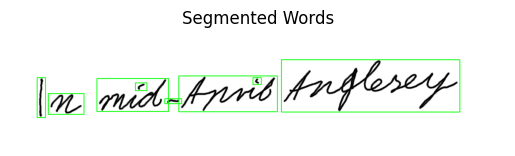

In [23]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

def image_to_binary(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Better contrast-preserving binarization
    binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 25, 15)
    return binary

def adaptive_kernel(binary_img):
    # Horizontal projection profile
    projection = np.sum(binary_img, axis=0)
    blank_cols = np.where(projection < np.max(projection) * 0.1)[0]
    gaps = np.diff(blank_cols)

    # Average gap between black regions
    if len(gaps) == 0:
        avg_gap = 20
    else:
        avg_gap = np.median(gaps)

    kernel_width = int(avg_gap * 1.2)
    kernel_width = max(15, min(kernel_width, 80))
    return kernel_width


def segment_words(binary_img):
    k_w = adaptive_kernel(binary_img)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (k_w, 5))
    dilated = cv2.dilate(binary_img, kernel, iterations=1)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Sort left-to-right
    bounding_boxes = sorted([cv2.boundingRect(c) for c in contours], key=lambda b: b[0])
    # After getting bounding_boxes:
    min_width = 15
    min_height = 15
    min_area = 150

    bounding_boxes = [
        (x, y, w, h) for (x, y, w, h) in bounding_boxes
        if w > min_width and h > min_height and (w * h) > min_area
    ]

    return bounding_boxes

def merge_small_boxes(boxes, y_threshold=20, x_overlap=0.7):
    merged = []
    skip = set()
    for i, (x1, y1, w1, h1) in enumerate(boxes):
        if i in skip or w1 * h1 > 300:  # skip large boxes
            continue
        cx1, cy1 = x1 + w1 // 2, y1 + h1 // 2
        for j, (x2, y2, w2, h2) in enumerate(boxes):
            if i == j or j in skip or h2 <= h1:
                continue
            cx2, cy2 = x2 + w2 // 2, y2 + h2 // 2
            vertical_close = abs((y1 + h1) - y2) < y_threshold
            horizontal_overlap = (x1 >= x2 and x1 <= x2 + w2) or (x2 >= x1 and x2 <= x1 + w1)
            if vertical_close and horizontal_overlap:
                new_x = min(x1, x2)
                new_y = min(y1, y2)
                new_w = max(x1 + w1, x2 + w2) - new_x
                new_h = max(y1 + h1, y2 + h2) - new_y
                merged.append((new_x, new_y, new_w, new_h))
                skip.update({i, j})
                break
        else:
            merged.append((x1, y1, w1, h1))  # not merged
    return merged


def extract_and_save_words(img, bounding_boxes, out_dir, base_name):
    os.makedirs(out_dir, exist_ok=True)
    for i, (x, y, w, h) in enumerate(bounding_boxes):
        if w < 10 or h < 10: continue  # Skip noise
        word_img = img[y:y+h, x:x+w]
        out_path = f"{out_dir}/{base_name}_word{i:02d}.png"
        cv2.imwrite(out_path, word_img)

def process_line_image(img_path, out_dir):
    base = os.path.splitext(os.path.basename(img_path))[0]
    binary = image_to_binary(img_path)
    boxes = segment_words(binary)
    boxes = merge_small_boxes(boxes)
    original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    extract_and_save_words(original, boxes, out_dir, base)

def visualize_segmentation(img_path, boxes):
    img = cv2.imread(img_path)
    for (x, y, w, h) in boxes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Segmented Words")
    plt.show()

# --- Example usage ---
if __name__ == "__main__":
    path = "./Data/lineImages/z01/z01-000/z01-000-01.tif"  # ← Change to your image path
    out_dir = "./words_out"
    binary = image_to_binary(path)
    boxes = segment_words(binary)
    visualize_segmentation(path, boxes)
    process_line_image(path, out_dir)


In [24]:
# import cv2
# import numpy as np
# from PIL import Image

# def visualize_word_contours(image_path, kernel_size=(30, 5), output_path="words_contours.png"):
#     # Step 1: Load + convert to grayscale via PIL (handles TIFF better)
#     img = Image.open(image_path).convert("L")
#     img_np = np.array(img)

#     # Step 2: Binarize the image (white text, black background)
#     _, binary = cv2.threshold(img_np, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#     # Step 3: Dilate to merge letters into words
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
#     dilated = cv2.dilate(binary, kernel, iterations=1)
    
#     # Step 4: Find contours (each word is one contour)
#     contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     # Step 5: Convert original to color for visualization
#     vis_img = cv2.cvtColor(img_np, cv2.COLOR_GRAY2BGR)

#     # Step 6: Draw bounding boxes + contour lines
#     for i, contour in enumerate(contours):
#         x, y, w, h = cv2.boundingRect(contour)
#         cv2.rectangle(vis_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # green box
#         cv2.drawContours(vis_img, [contour], -1, (0, 0, 255), 1)        # red contour line

#     # Step 7: Save visualization image
#     cv2.imshow('test', vis_img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     print(f"Saved contour visualization to: {output_path}")
# visualize_word_contours("./Data/lineImages/a01/a01-000/a01-000u-01.tif")

In [25]:
# import requests
# from PIL import Image
# from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# # --- Step 1: Load a pretrained TrOCR model and processor ---
# # This will download the model on the first run
# processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
# model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

# # --- Step 2: Load your handwritten image ---
# # For best results, use an image of a single line of text.
# # You may need to use image processing techniques (like OpenCV) to crop lines from a full page.
# image_url = './Data/lineImages/z01/z01-000/z01-000-02.tif' # An example from the IAM dataset
# image = Image.open(image_url).convert("RGB")

# # --- Step 3: Process the image and generate text ---
# pixel_values = processor(images=image, return_tensors="pt").pixel_values
# generated_ids = model.generate(pixel_values)

# # --- Step 4: Decode the recognized text ---
# # The output string will contain the words, correctly segmented by spaces.
# transcribed_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# print("Recognized and Segmented Text:")
# print(transcribed_text)

# # You can now easily split this into a list of words
# words = transcribed_text.split()
# print("\nList of Segmented Words:")
# print(words)